# Tutorial 3a. Homemade one-hidden layer perceptron for binary classification

![](mlp.svg)

## This is a homework: put your names here

- `Alexander Morakhovski`
- `Julian Lechuga Lopez`

## Description

The goal of this tutorial is to build and train your first neural network *by hand* !

- To keep things as simple as possible we consider a simple *perceptron* with *one hidden layer*
- We consider a binary-classification problem which cannot be solved with a linear classifier
- We use a toy dataset which is already created for you with the `load_data()` function

The neural network will have to be **programmed and trained from scratch**, meaning that you will have to define its structure yourself, and that **you are not allowed** to use the built-in functionalities of `PyTorch` for autodifferentiation. You will have to program the forward and backward pass *yourself*, together with the gradient descent algorithm.

**Read the following instructions carefully in order to succeed**

- You are already provided with a simple python class which will constitute your neural network. 

- The constructor of this class (`__init__`) requires you to specify the following parameters (investigate the data carefully in order to know how these parameters need to be defined).
    - Number of input nodes (number of features)
    - Number of hidden units 
    - Number of output nodes

- The constructor of the neural network also requires you to allocate the weight matrices and bias vectors which will be the main components of your computational graph. For this, you can use some of the tensor operations we have seen in `tutorial2a`, in order to initialize at random the weights, for instance.

- Implementing a neural network consists in two main steps:
    - Forward-pass: computing the output of the network based on its weight matrices and bias vectors. Since we consider binary classification, we should output activations that are activated by a sigmoid
    - Backward-pass: computing how different the predictions of the network are from what should be predicted and update the parameters of the network with the backpropagation algorithm. You are already provided with a loss function in the code which requires only slight modifications.

- If you want to challenge yourself you can extend the neural network as follows:
    - add multiple hidden layers of different sizes
    - explore different non-linear activation functions
    - investigate whether the network starts overfitting

In [1]:
import numpy as np
import torch
import sklearn
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

## Simulation of the data

In [2]:
def load_data(n_samples=500):
    return make_gaussian_quantiles(
        mean=None,
        cov=0.7,
        n_samples=n_samples,
        n_features=2,
        n_classes=2,
        shuffle=True,
        random_state=42,
    )

In [3]:
gaussian_quantiles = load_data()
X, y = gaussian_quantiles

print(X[:10, :])
print(y[:10])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

[[-1.13773727  0.62436053]
 [-0.75970745 -1.18161805]
 [-0.82471758  0.42171557]
 [-0.09398039 -0.18487643]
 [-0.80731289  0.57399183]
 [ 0.67980788  1.13471182]
 [-1.70521733 -0.84342552]
 [ 1.57461467  1.12565917]
 [-0.22579357 -0.81889248]
 [ 0.97317262  0.00856159]]
[1 1 0 0 1 1 1 1 0 1]


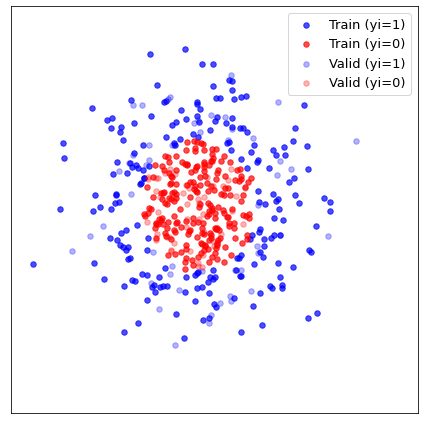

In [4]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_data(X, y, xy_labels=True, label=None, **kwargs):
    X_1 = X[y == 1]
    X_0 = X[y == 0]
    if label is not None:
        plt.scatter(X_1[:, 0], X_1[:, 1], c="blue", s=30, label=label + " (yi=1)", **kwargs)
        plt.scatter(X_0[:, 0], X_0[:, 1], c="red", s=30, label=label + " (yi=0)", **kwargs)
    plt.xticks(())
    plt.yticks(())
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.figure(figsize=(6, 6))
plot_data(X_train, y_train, alpha=0.7, label="Train")
plot_data(X_test, y_test, alpha=0.3, label="Valid")
plt.legend(fontsize=13)
plt.tight_layout()

## A neural network class

**QUESTION.** Implement the `forward` and `backward` methods in the following class, and fill the `__init__` and `train` methods, in order to train the one-hidden layer perceptron for binary classification. 

In [5]:
print(X_train.shape)
print(y_train.shape)

(400, 2)
(400,)


In [368]:
class NeuralNetwork:
    
    def __init__(self, n_in, n_hidden, n_out):
        # number of input nodes
        self.n_x = n_in

        # number of hidden nodes
        self.n_h = n_hidden

        # number of output nodes
        self.n_y = n_out

        # Define 1st weight matrix (using random initialization)
        self.W1 = torch.rand(n_in, n_hidden)

        # define 1st bias vector
        self.b1 = torch.rand(n_hidden)

        # Define 2nd weight matrix (using random initialization)
        self.W2 = torch.rand(n_hidden, n_out)


        # Define 2nd bias vector
        self.b2 = torch.rand(n_out)
            
    
    def sigmoid(self,Z):
        return 1/(1 + torch.exp(-Z))

    def sigmoid_derivative(self, s):
        return s * (1 - s)
    
    def forward(self, X):
        self.Z1 = torch.matmul(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = torch.matmul(self.A1, self.W2) + self.b2
        self.yhat = self.sigmoid(self.Z2)
                                  
    def backward(self, X, y):
        
        y = torch.reshape(y, (y.shape[0], 1))
        # Derivative of binary cross entropy cost w.r.t. final output y4
        #self.dC_dyhat = self.yhat - y
        
        dl_wrt_z3 = self.yhat - y
        
        '''
        Gradients for w2: partial derivative of cost w.r.t. w2
        dC/dw2
        '''
        dl_wrt_z2 = dl_wrt_z3*self.sigmoid_derivative(self.yhat)
        dl_wrt_w2 = torch.matmul(self.A1.T, dl_wrt_z2)
        dl_wrt_b2 = torch.sum(dl_wrt_z2, dim = 0)/y.shape[0]
        
        #self.dyhat_dz2 = self.sigmoid_derivative(self.yhat)
        #self.dz2_dw2 = self.A1

        # yhat delta: dC_dyhat dyhat_dz2
        #self.yhat_delta = self.dC_dyhat * self.dyhat_dz2
        #self.yhat_delta = dl_wrt_z3*self.sigmoid_derivative(self.yhat)
        
        # This is our gradients for w2: dC_dy4 dy4_dy3 dy3_dw2
        #self.dC_dw2 = torch.matmul(torch.t(self.dz2_dw2), self.yhat_delta)
        #self.dC_db2 = torch.sum(self.yhat_delta, dim=0)/y.shape[0]
        '''
        Gradients for w1: partial derivative of cost w.r.t w1
        dC/dw1
        '''
        
        dl_wrt_z1 = torch.matmul(dl_wrt_z2, self.W2.T)* self.sigmoid_derivative(self.A1)
        dl_wrt_w1 = torch.matmul(X.T, dl_wrt_z1)
        dl_wrt_b1 = torch.sum(dl_wrt_z1, dim = 0)/y.shape[0]
        
        #self.dz2_da1 = self.W2
        #self.da1_dz1 = self.sigmoid_derivative(self.A1)

        # Y2 delta: (dC_dy4 dy4_dy3) dy3_dy2 dy2_dy1
        #self.a1_delta = torch.matmul(self.yhat_delta, torch.t(self.dz2_da1))* self.da1_dz1

        # Gradients for w1: (dC_dy4 dy4_dy3) dy3_dy2 dy2_dy1 dy1_dw1
        #self.dC_dw1 = torch.matmul(torch.t(X), self.a1_delta)
        #self.dC_db1 = torch.sum(self.a1_delta, dim = 0)/y.shape[0]
        
        #return self.dC_dw1, self.dC_db1, self.dC_dw2, self.dC_db2
        return dl_wrt_w1, dl_wrt_b1, dl_wrt_w2, dl_wrt_b2
        
    def train(self, X_train, y_train, X_valid, y_valid, epochs, learning_rate):
        loss = []
        m = X_train.shape[0]
        for e in range(epochs):
            
            
            self.forward(X_train)
            
            self.test(X_train, y_train)
            
            training_loss = torch.mean(-(y_train*torch.log(self.yhat) + (1-y_train)*torch.log(1- self.yhat))).detach().item() 
            loss.append(training_loss)
            
            if e%100 == 0:
                print("EPOCH: {} Loss: {} Accuracy: {}".format(e, training_loss, self.accuracy))
            
            
            dl_wrt_w1, dl_wrt_b1, dl_wrt_w2, dl_wrt_b2 = self.backward(X_train, y_train)
            
            # update of the 1st weight matrix
            self.W1 -= learning_rate*dl_wrt_w1
            
            # update of the 1st bias vector
            self.b1 -= learning_rate*dl_wrt_b1
            
            # update of the 2nd weight matrix
            self.W2 -= learning_rate*dl_wrt_w2
            
            # update of the 2nd bias vector
            self.b2 -= learning_rate*dl_wrt_b2
        print("Final Loss: {} Accuracy: {}".format(training_loss, self.accuracy))
        return loss
    
    def test(self, X_valid, y_valid):
        yhat = (self.yhat > 0.5) 
        correct = 0
        for i in range(yhat.shape[0]):
            if y_valid[i] == yhat[i]:
                correct+=1
        self.accuracy = correct/y_valid.shape[0]*100
        #print("Accuracy: ", self.accuracy)
        

**QUESTION.** Train your neural network, modify your code to save the training and validation error along the gradient descent iterations and plot them. You should also print the train and validation errors during training.

In [372]:
X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train).float()
X_valid_torch = torch.from_numpy(X_test).float()
y_valid_torch = torch.from_numpy(y_test).float()

nn = NeuralNetwork(2, 16, 1)

loss = nn.train(
    X_train_torch,
    y_train_torch,
    X_valid_torch,
    y_valid_torch,
    epochs = 2500,
    learning_rate = 0.001
)

EPOCH: 0 Loss: 2.523761034011841 Accuracy: 49.75
EPOCH: 100 Loss: 1.8067158460617065 Accuracy: 49.75
EPOCH: 200 Loss: 0.6936237812042236 Accuracy: 56.00000000000001
EPOCH: 300 Loss: 0.693641722202301 Accuracy: 57.25
EPOCH: 400 Loss: 0.6936787962913513 Accuracy: 58.75
EPOCH: 500 Loss: 0.69373619556427 Accuracy: 59.25
EPOCH: 600 Loss: 0.6938150525093079 Accuracy: 60.0
EPOCH: 700 Loss: 0.6939168572425842 Accuracy: 60.75000000000001
EPOCH: 800 Loss: 0.6940423846244812 Accuracy: 62.74999999999999
EPOCH: 900 Loss: 0.6941920518875122 Accuracy: 63.24999999999999
EPOCH: 1000 Loss: 0.6943653225898743 Accuracy: 64.5
EPOCH: 1100 Loss: 0.6945610046386719 Accuracy: 65.25
EPOCH: 1200 Loss: 0.6947770118713379 Accuracy: 67.0
EPOCH: 1300 Loss: 0.6950114965438843 Accuracy: 68.25
EPOCH: 1400 Loss: 0.6952626705169678 Accuracy: 69.25
EPOCH: 1500 Loss: 0.6955293416976929 Accuracy: 70.5
EPOCH: 1600 Loss: 0.6958116888999939 Accuracy: 71.75
EPOCH: 1700 Loss: 0.6961108446121216 Accuracy: 73.0
EPOCH: 1800 Loss: 0

In [327]:
loss[0],loss[-1]

(0.8914545178413391, 0.6935734152793884)

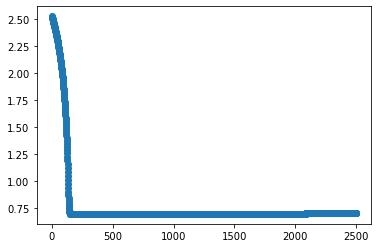

In [373]:
plt.scatter(range(len(loss)), loss, label="Train")

## Assessment of your model

**QUESTION.** Use and modify the plotting functions from this notebook and the ones from `tutorial01` in order to plot the data together with the **predicted probabilities** of your neural network for inputs in a grid covering the input features space (as we did in `tutorial01`). Also, display on the plot the AUC-ROC metric obtained by your neural net.